In [3]:
pip install ipython-autotime

In [1]:
pip install ypstruct

  Created wheel for ypstruct: filename=ypstruct-0.0.2-py3-none-any.whl size=2971 sha256=d21867c1d8d40cf703fc19816194ad5240e5833bca45d692338ae5d50be02cec
  Stored in directory: /root/.cache/pip/wheels/62/c0/62/97e51a118545a181245d8111048d46ad4fbd0c0078c6804218
Successfully built ypstruct


In [4]:
#pip install ypstruct
# pip install -U memory_profiler
# pip install ipython-autotime
%load_ext autotime
# %load_ext memory_profiler

time: 129 µs (started: 2022-02-26 07:11:29 +00:00)


In [5]:
#pip install ypstruct

time: 1.35 ms (started: 2022-02-26 07:11:30 +00:00)


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from ypstruct import structure

time: 3.04 ms (started: 2022-02-26 07:11:34 +00:00)


In [7]:
# mlp for multi-output regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense,Dropout, BatchNormalization
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
from tensorflow.keras.metrics import RootMeanSquaredError
from keras import backend as K
from sklearn.model_selection import KFold
import numpy as np
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from tensorflow import keras
import pickle 
import copy

time: 2.95 s (started: 2022-02-26 07:11:35 +00:00)


In [8]:
# mlp for multi-output regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense,Dropout, BatchNormalization
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
from tensorflow.keras.metrics import RootMeanSquaredError
from keras import backend as K
from sklearn.model_selection import KFold

time: 7.23 ms (started: 2022-02-26 07:11:43 +00:00)


In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive
time: 16.5 s (started: 2022-02-26 07:11:45 +00:00)


In [10]:
cd /content/gdrive/MyDrive/Colab Notebooks/pandemic

/content/gdrive/MyDrive/Colab Notebooks/pandemic
time: 7.42 ms (started: 2022-02-26 07:26:01 +00:00)


In [11]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("./my_model",compile=False)

#load scaler
with open("my_scaler_x.pkl","rb") as f:
    loaded_scaler_x= pickle.load(f)

with open("my_scaler_y.pkl","rb") as f:
    loaded_scaler_y= pickle.load(f)

time: 4.38 s (started: 2022-02-26 07:26:02 +00:00)


In [12]:
# def sphere(x):
#     return sum(x**4)


def obfunc ( arr ):
    arr = np.array(arr)
    arr=arr[np.newaxis,:]
    X_scaled= loaded_scaler_x.transform(arr)    
    predicted_y= loaded_scaler_y.inverse_transform(reconstructed_model.predict(X_scaled))
    
    return predicted_y[0,0]

#example = [25, 30, 3.5,  7. ,  0.2, 25. , 15. , 30.]
#obfunc(example)


time: 6.98 ms (started: 2022-02-26 07:26:06 +00:00)


Problem Definition

In [13]:
problem = structure()
problem.costfunc = obfunc
problem.nvar = 8
problem.varmin = [10, 25, 3, 1,  0.2, 23, 2, 15]
problem.varmax = [ 25, 45,  5.5,  5, 0.5, 26, 10, 30]

time: 3.86 ms (started: 2022-02-26 07:26:06 +00:00)


GA Parameters

In [14]:
params = structure()
params.maxit = 100
params.npop = 50
params.beta = 1
params.pc = 1
params.gamma = 0.01
params.mu = 0.01
params.sigma = 0.1

time: 4.94 ms (started: 2022-02-26 07:26:06 +00:00)


Run GA

In [15]:
# import sys
# sys.path.append('/content/drive/My Drive/Colab Notebooks/Genetic/draft3.ipynb')
import got

time: 332 ms (started: 2022-02-26 07:26:06 +00:00)


In [16]:
out = got.run(problem, params)

Iteration 0: Best Cost = 16417.974609375
Iteration 1: Best Cost = 16417.974609375
Iteration 2: Best Cost = 16343.19140625
Iteration 3: Best Cost = 13778.3291015625
Iteration 4: Best Cost = 13778.3291015625
Iteration 5: Best Cost = 13778.3291015625
Iteration 6: Best Cost = 13778.3291015625
Iteration 7: Best Cost = 13778.3291015625
Iteration 8: Best Cost = 13778.3291015625
Iteration 9: Best Cost = 13778.3291015625
Iteration 10: Best Cost = 13675.25
Iteration 11: Best Cost = 13496.1337890625
Iteration 12: Best Cost = 13496.1337890625
Iteration 13: Best Cost = 13417.724609375
Iteration 14: Best Cost = 13387.4912109375
Iteration 15: Best Cost = 13387.4912109375
Iteration 16: Best Cost = 13334.568359375
Iteration 17: Best Cost = 13310.90625
Iteration 18: Best Cost = 13295.2666015625
Iteration 19: Best Cost = 13295.2666015625
Iteration 20: Best Cost = 13050.8828125
Iteration 21: Best Cost = 13050.8828125
Iteration 22: Best Cost = 13050.8828125
Iteration 23: Best Cost = 13046.51171875
Iteratio

Results

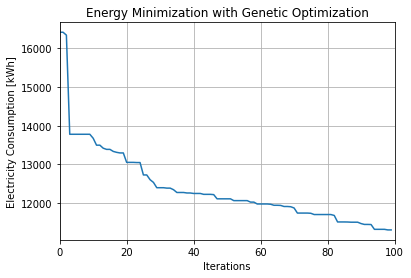

time: 183 ms (started: 2022-02-26 07:30:13 +00:00)


In [17]:
 plt.plot(out.bestcost)
# plt.semilogy(out.bestcost)
plt.xlim(0, params.maxit)
plt.xlabel('Iterations')
plt.ylabel('Electricity Consumption [kWh]')
plt.title('Energy Minimization with Genetic Optimization')
plt.grid(True)
plt.show()

In [18]:
out['bestsol']

struct({'position': array([23.56730928, 32.1740959 ,  5.49489833,  4.75849333,  0.20232443,
       25.97672177,  7.19990933, 24.43558339]), 'cost': 11303.63})

time: 4.2 ms (started: 2022-02-26 07:30:13 +00:00)


In [19]:
popula = out.pop
#popula
x, y= zip(*popula)
arr =[]
arr2 = []
for x in popula:
  arr.append(x['position'])
  arr2.append(x['cost'])

df = pd.DataFrame(arr)
df['cost']=arr2
#df
#df.corr().style.background_gradient(cmap='coolwarm')
#plt.matshow(df.corr())
#import seaborn as sns
#sns.pairplot(df)

time: 9.3 ms (started: 2022-02-26 07:30:13 +00:00)
